In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import configs

# Parameters

In [2]:
internal_dim = 24
generic_exp_name = 'lineartrack'
network_yaml = 'dm'
pre_episode = 50
post_episode = 600
_iter = 4

In [3]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
latents_dir = f'{engram_dir}latents/{exp_name}/'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

# Load analyses dataframes

In [4]:
with open(f'{analysis_dir}representation_df_ep{pre_episode}.p', 'rb') as f:
    pre_repr_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{pre_episode}.p', 'rb') as f:
    pre_T_df = pickle.load(f)
    
with open(f'{analysis_dir}representation_df_ep{post_episode}.p', 'rb') as f:
    post_repr_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{post_episode}.p', 'rb') as f:
    post_T_df = pickle.load(f)

# Helper functions

In [5]:
def retrieve_lineartrack(heatmap):
    receptive_field = []
    receptive_field.extend(list(heatmap[1,1:-1]))
    receptive_field.extend(list(heatmap[2:-1,-2]))
    receptive_field.extend(list(heatmap[-2,-3:0:-1]))
    receptive_field.extend(list(heatmap[-3:0:-1,1]))
    return receptive_field

# Make encoder receptive fields

In [6]:
np.unique(pre_repr_df['model'])

array(['lineartrack_g0_-2_entro-2', 'lineartrack_noq_g0_-2_entro-2'],
      dtype=object)

In [10]:
model = f'{generic_exp_name}_g0_-2_entro-2'

In [9]:
pre_df = pre_repr_df[pre_repr_df['model'] == model]
pre_df = pre_df[pre_df['iteration'] == _iter]

In [10]:
post_df = post_repr_df[post_repr_df['model'] == model]
post_df = post_df[post_df['iteration'] == _iter]

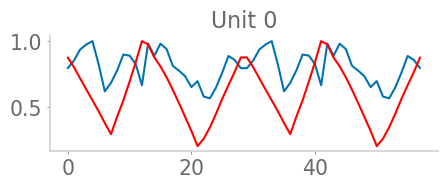

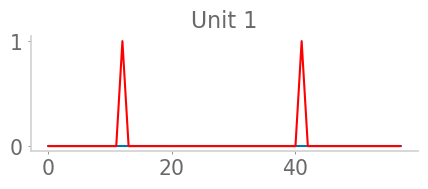

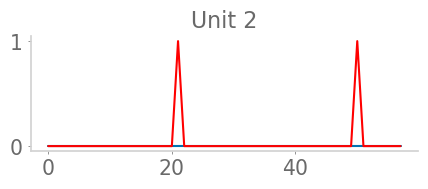

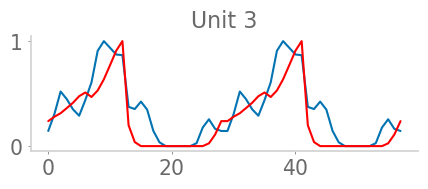

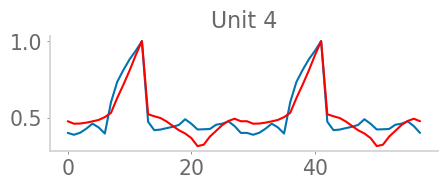

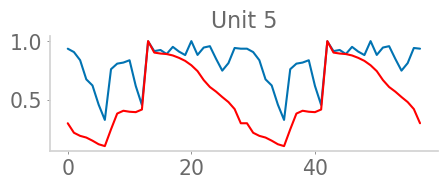

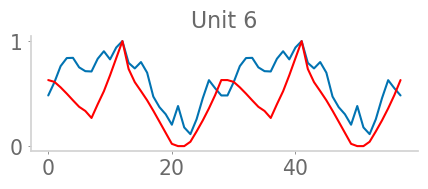

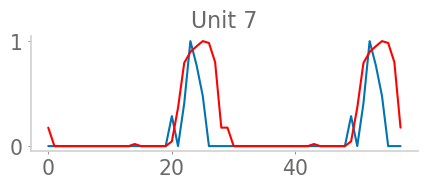

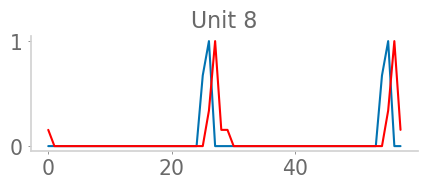

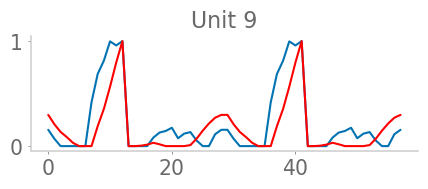

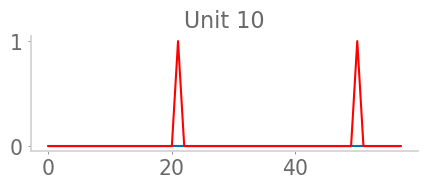

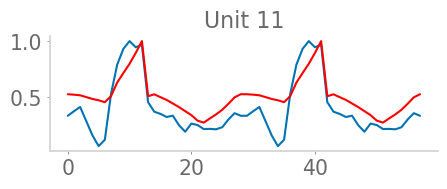

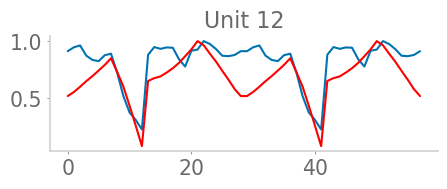

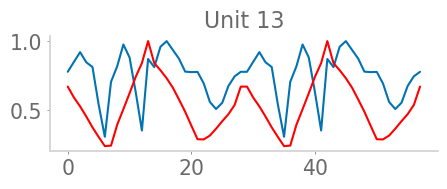

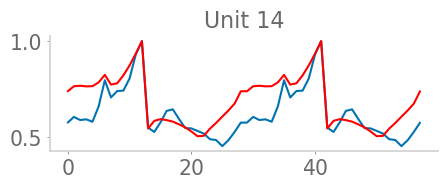

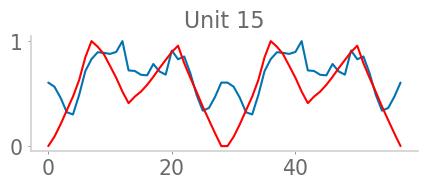

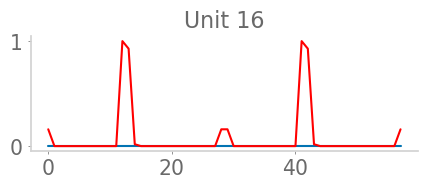

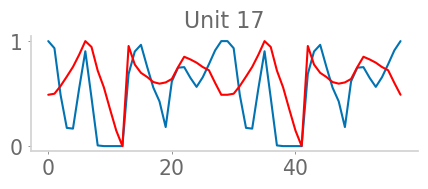

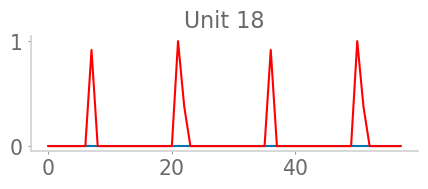

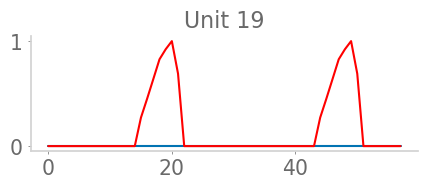

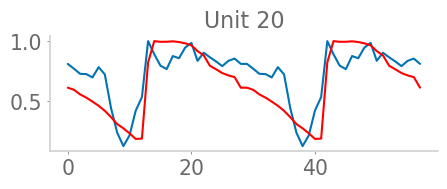

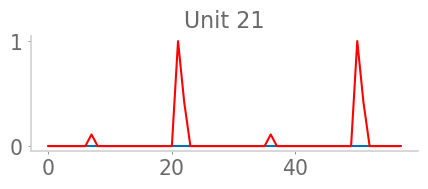

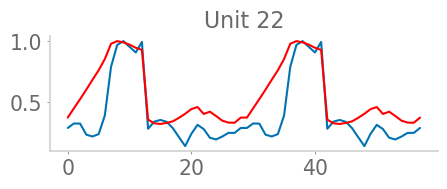

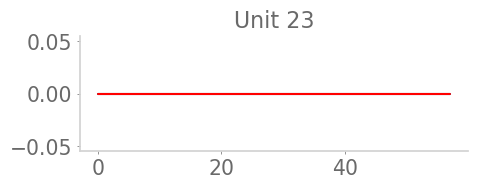

In [12]:
width = np.max(pre_df['x']) + 2
height = np.max(pre_df['y']) + 2

_sample = np.array(pre_df.head(1)['latents'].item())
n_units = _sample.size
pre_heatmap = np.zeros((n_units, width, height))
post_heatmap = np.zeros((n_units, width, height))

for _, row in pre_df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['latents'])
    pre_heatmap[:,x,y] = latents
    
for _, row in post_df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['latents'])
    post_heatmap[:,x,y] = latents
    
goal_state = row['goal_state']
    
for unit in range(n_units):
    plt.figure(figsize=(5,1.5))
    pre_m = pre_heatmap[unit]
    pre_m[pre_m<0] = 0
    if pre_m.max() > 0:
        pre_m /= pre_m.max()
    post_m = post_heatmap[unit]
    post_m[post_m<0] = 0
    if post_m.max() > 0:
        post_m /= post_m.max()
    plt.plot(retrieve_lineartrack(pre_m)*2)
    plt.plot(retrieve_lineartrack(post_m)*2, color='red')
    plt.title(f'Unit {unit}')
    plt.show()

# Make transition network receptive fields

In [13]:
np.unique(pre_T_df['model'])

array(['lineartrack_g0_-2_entro-2'], dtype=object)

In [14]:
pre_df = pre_T_df[pre_T_df['model'] == model]
pre_df = pre_df[pre_df['iteration'] == _iter]

In [15]:
post_df = post_T_df[post_T_df['model'] == model]
post_df = post_df[post_df['iteration'] == _iter]

In [17]:
n_actions = 4

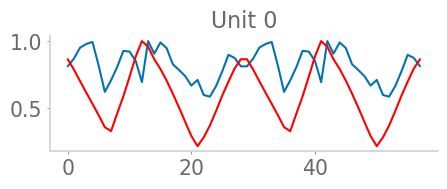

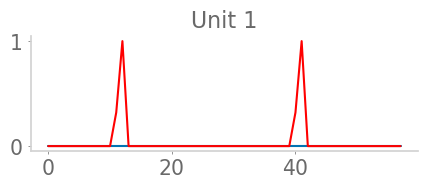

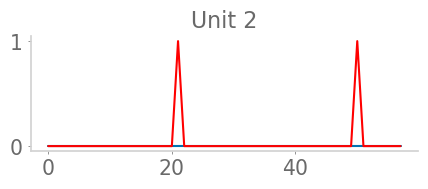

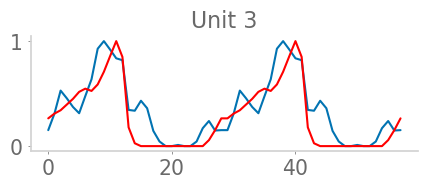

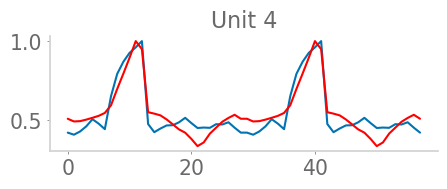

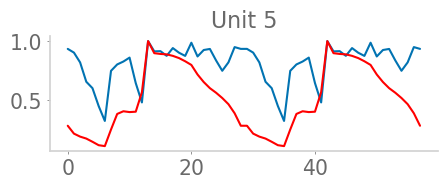

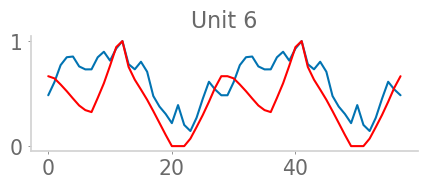

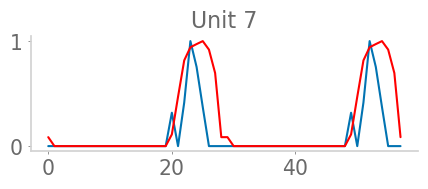

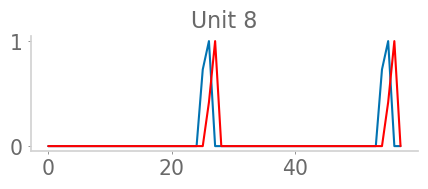

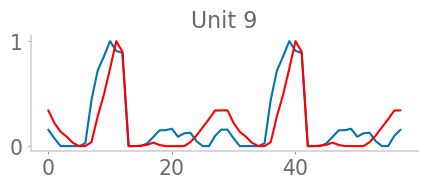

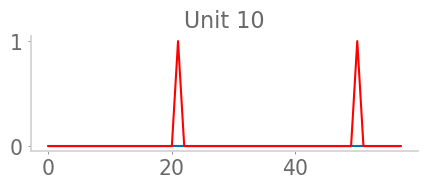

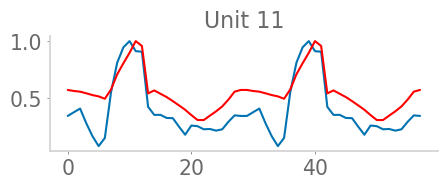

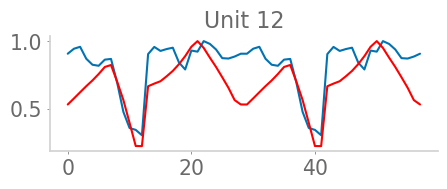

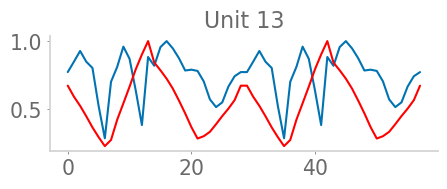

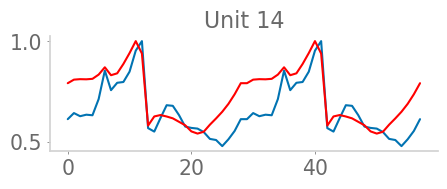

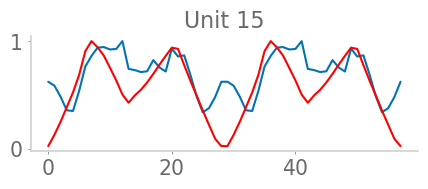

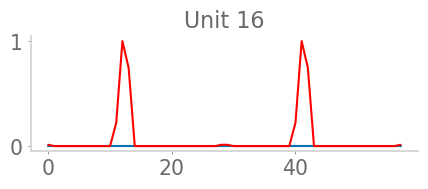

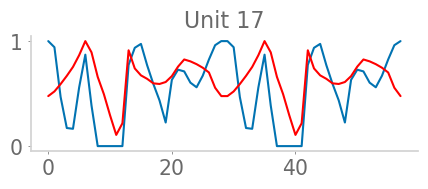

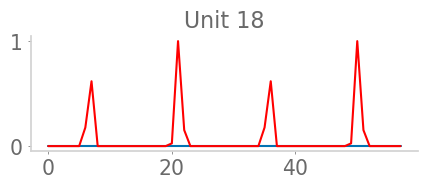

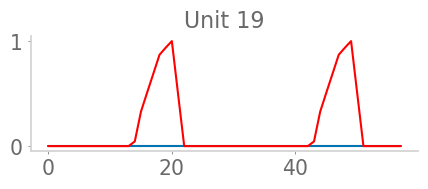

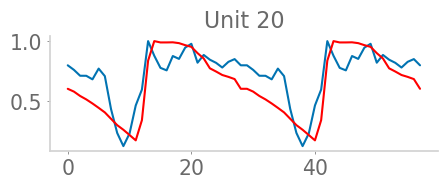

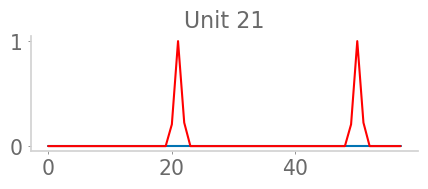

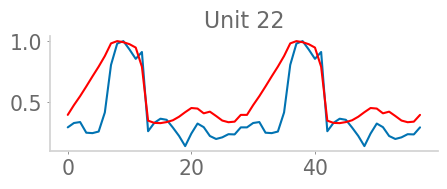

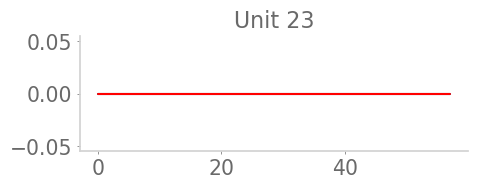

In [18]:
width = np.max(pre_df['x']) + 2
height = np.max(pre_df['y']) + 2

_sample = np.array(pre_df.head(1)['outputs'].item())
n_units = _sample.size
pre_heatmap = np.zeros((n_actions, n_units, width, height))
post_heatmap = np.zeros((n_actions, n_units, width, height))

for _, row in pre_df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['outputs'])
    action = np.array(row['action'])
    pre_heatmap[action,:,x,y] = latents
    
for _, row in post_df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['outputs'])
    action = np.array(row['action'])
    post_heatmap[action,:,x,y] = latents
    
goal_state = row['goal_state']
    
for unit in range(n_units):
    plt.figure(figsize=(5,1.5))
    pre_m = np.mean(pre_heatmap[:,unit], axis=0)
    pre_m[pre_m<0] = 0
    if pre_m.max() > 0:
        pre_m /= pre_m.max()
    post_m = np.mean(post_heatmap[:,unit], axis=0)
    post_m[post_m<0] = 0
    if post_m.max() > 0:
        post_m /= post_m.max()
    plt.plot(retrieve_lineartrack(pre_m)*2)
    plt.plot(retrieve_lineartrack(post_m)*2, color='red')
    plt.title(f'Unit {unit}')
    plt.show()

# Comparing Encoder/Transition receptive fields

In [21]:
np.unique(pre_df['model'])

array(['lineartrack_g0_-2_entro-2'], dtype=object)

In [22]:
model = f'{generic_exp_name}_g0_-2_entro-2'

In [23]:
encoder_df = post_repr_df[post_repr_df['model'] == model]
encoder_df = encoder_df[encoder_df['iteration'] == _iter]

In [24]:
transition_df = post_T_df[post_T_df['model'] == model]
transition_df = transition_df[transition_df['iteration'] == _iter]

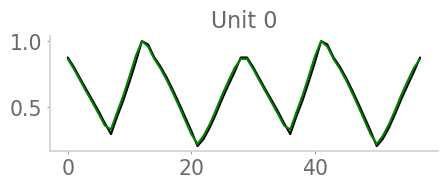

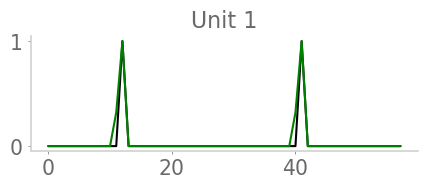

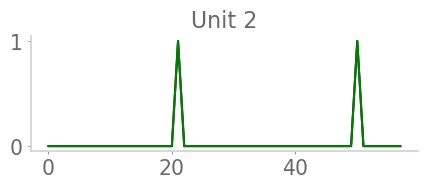

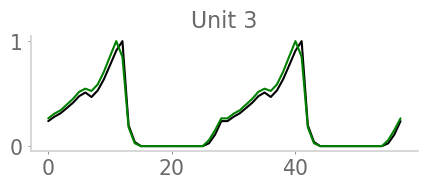

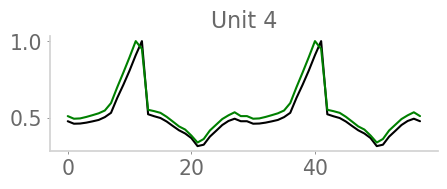

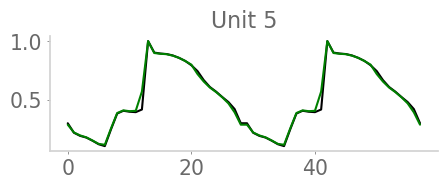

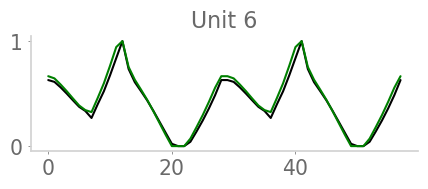

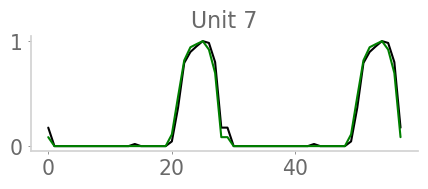

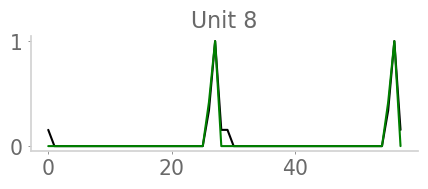

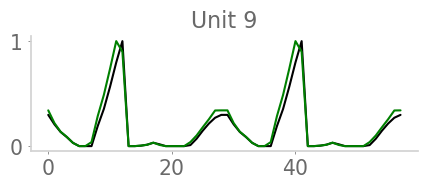

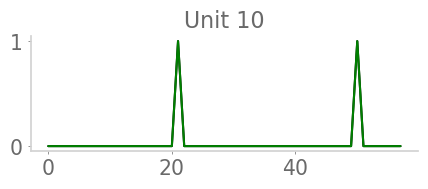

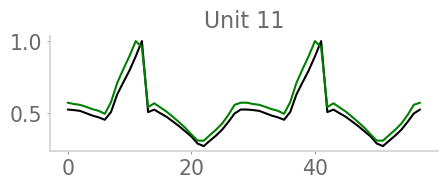

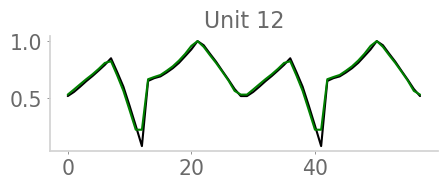

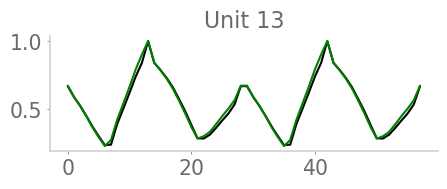

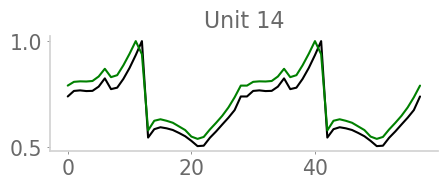

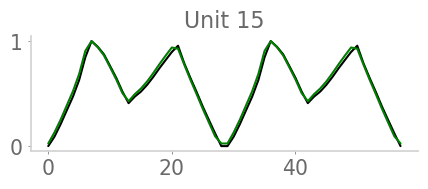

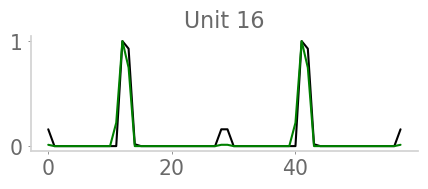

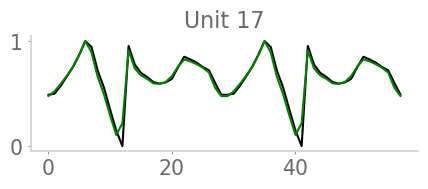

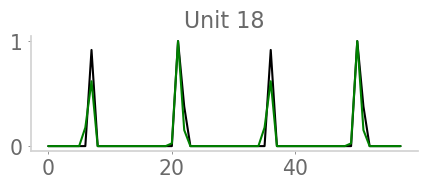

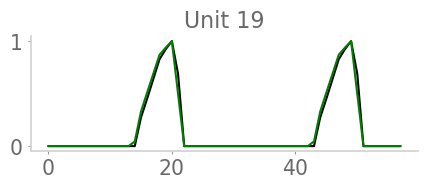

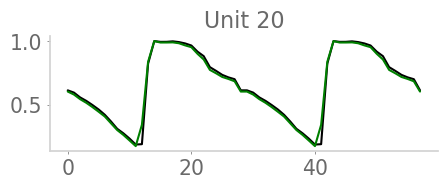

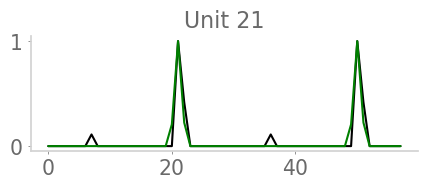

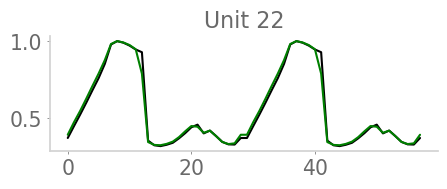

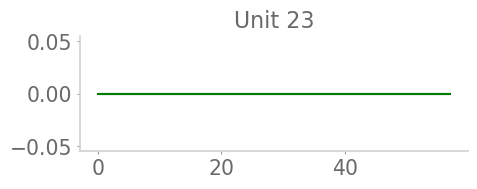

In [26]:
width = np.max(pre_df['x']) + 2
height = np.max(pre_df['y']) + 2

_sample = np.array(encoder_df.head(1)['latents'].item())
n_units = _sample.size
encoder_heatmap = np.zeros((n_units, width, height))
transition_heatmap = np.zeros((n_actions, n_units, width, height))

for _, row in encoder_df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['latents'])
    encoder_heatmap[:,x,y] = latents
    
for _, row in transition_df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['outputs'])
    action = np.array(row['action'])
    transition_heatmap[action,:,x,y] = latents
    
goal_state = row['goal_state']
    
for unit in range(n_units):
    plt.figure(figsize=(5,1.5))
    encoder_m = encoder_heatmap[unit]
    encoder_m[encoder_m<0] = 0
    if encoder_m.max() > 0:
        encoder_m /= encoder_m.max()
    
    transition_m = np.mean(transition_heatmap[:,unit], axis=0)
    transition_m[transition_m<0] = 0
    if transition_m.max() > 0:
        transition_m /= transition_m.max()
    transition_m = np.mean(transition_heatmap[:,unit], axis=0)
    transition_m[transition_m<0] = 0
    if transition_m.max() > 0:
        transition_m /= transition_m.max()
    plt.plot(retrieve_lineartrack(encoder_m)*2, color='black')
    plt.plot(retrieve_lineartrack(transition_m)*2, color='green')
    plt.title(f'Unit {unit}')
    plt.show()

# Plotting Value Warping

In [7]:
np.unique(pre_T_df['model'])

array(['lineartrack_g0_-2_entro-2', 'lineartrack_noq_g0_-2_entro-2'],
      dtype=object)

In [8]:
model = f'{generic_exp_name}_g0_-2_entro-2'

In [12]:
noq_model = f'{generic_exp_name}_noq_g0_-2_entro-2'

In [13]:
n_actions = 4

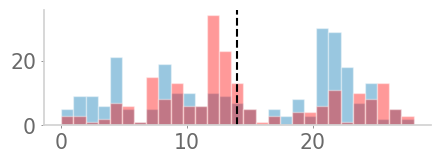

In [27]:
pre_m_peaks = []
post_m_peaks = []
for _iter in range(10):
    pre_df = post_T_df[post_T_df['model'] == noq_model]
    pre_df = pre_df[pre_df['iteration'] == _iter]

    post_df = post_T_df[post_T_df['model'] == model]
    post_df = post_df[post_df['iteration'] == _iter]

    width = np.max(pre_df['x']) + 2
    height = np.max(pre_df['y']) + 2

    _sample = np.array(pre_df.head(1)['outputs'].item())
    goal_state = pre_df.head(1)['goal_state'].item()
    n_units = _sample.size
    pre_heatmap = np.zeros((n_actions, n_units, width, height))
    post_heatmap = np.zeros((n_actions, n_units, width, height))
    goal_map = np.zeros((width, height))
    goal_map[goal_state[0], goal_state[1]] = 1
    goal_idx = np.argwhere(retrieve_lineartrack(goal_map)).item()
    len_track = len(retrieve_lineartrack(goal_map))
    
    for _, row in pre_df.iterrows():
        x = row['x']
        y = row['y']
        latents = np.array(row['outputs'])
        action = np.array(row['action'])
        pre_heatmap[action,:,x,y] = latents

    for _, row in post_df.iterrows():
        x = row['x']
        y = row['y']
        latents = np.array(row['outputs'])
        action = np.array(row['action'])
        post_heatmap[action,:,x,y] = latents
        
    for unit in range(n_units):
        pre_m = np.mean(pre_heatmap[:,unit], axis=0)
        pre_m = np.array(retrieve_lineartrack(pre_m))
        pre_m = np.roll(pre_m, shift=-goal_idx)
        pre_m = np.roll(pre_m, shift=len_track//2)
        if pre_m.max() > 0:
            peak_locs = np.argwhere(pre_m == pre_m.max()).squeeze()
            if peak_locs.size == 1:
                pre_m_peaks.append(peak_locs.item())
            else:
                pre_m_peaks.extend(peak_locs.tolist())
            
        post_m = np.mean(post_heatmap[:,unit], axis=0)
        post_m = np.array(retrieve_lineartrack(post_m))
        post_m = np.roll(post_m, shift=-goal_idx)
        post_m = np.roll(post_m, shift=len_track//2)
        if post_m.max() > 0:
            peak_locs = np.argwhere(post_m == post_m.max()).squeeze()
            if peak_locs.size == 1:
                post_m_peaks.append(peak_locs.item())
            else:
                post_m_peaks.extend(peak_locs.tolist())
plt.figure(figsize=(5,1.5))
plt.hist(pre_m_peaks, bins=len_track, alpha=0.4)
plt.hist(post_m_peaks, color='red', bins=len_track, alpha=0.4)
plt.axvline(len_track//2, color='black', linestyle='--')
plt.show()